# IMPORT DATA

In [176]:
import pandas as pd
dataframe = pd.read_csv('dataset.csv')
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   address                              16714 non-null  object 
 1   Age                                  16714 non-null  int64  
 2   Age (bin)                            16714 non-null  object 
 3   brand                                16714 non-null  object 
 4   country                              16714 non-null  object 
 5   customer_id                          16714 non-null  int64  
 6   customer_id-1                        16714 non-null  int64  
 7   customer_id-2                        16714 non-null  int64  
 8   deceased_indicator                   16714 non-null  object 
 9   DOB                                  16714 non-null  int64  
 10  first_name                           16714 non-null  object 
 11  gender                      

In [177]:
modelling = dataframe[['customer_id','Age','gender','job_title','tenure','state','job_industry_category','owns_car','property_valuation','Profit']]
modelling

,customer_id,Age,gender,job_title,tenure,state,job_industry_category,owns_car,property_valuation,Profit
0,1,69,Female,Executive Secretary,11,NSW,Health,OWNS CAR,10,110.56
1,1,69,Female,Executive Secretary,11,NSW,Health,OWNS CAR,10,751.02
2,1,69,Female,Executive Secretary,11,NSW,Health,OWNS CAR,10,189.28
3,1,69,Female,Executive Secretary,11,NSW,Health,OWNS CAR,10,90.10
4,1,69,Female,Executive Secretary,11,NSW,Health,OWNS CAR,10,17.87
...,...,...,...,...,...,...,...,...,...,...
16709,753,52,Female,Food Chemist,6,NSW,Health,OWNS CAR,3,1383.61
16710,753,52,Female,Food Chemist,6,NSW,Health,OWNS CAR,3,1544.61
16711,753,52,Female,Food Chemist,6,NSW,Health,OWNS CAR,3,1230.30
16712,753,52,Female,Food Chemist,6,NSW,Health,OWNS CAR,3,1103.43


In [178]:
modelling.isna().sum()

customer_id                 0
Age                         0
gender                      0
job_title                   0
tenure                      0
state                       0
job_industry_category    2660
owns_car                    0
property_valuation          0
Profit                      0
dtype: int64

In [179]:
modellingV2 = modelling.dropna(axis=0).reset_index(drop=True)

In [180]:
modellingV2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14054 entries, 0 to 14053
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            14054 non-null  int64  
 1   Age                    14054 non-null  int64  
 2   gender                 14054 non-null  object 
 3   job_title              14054 non-null  object 
 4   tenure                 14054 non-null  int64  
 5   state                  14054 non-null  object 
 6   job_industry_category  14054 non-null  object 
 7   owns_car               14054 non-null  object 
 8   property_valuation     14054 non-null  int64  
 9   Profit                 14054 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 1.1+ MB


In [181]:
categorical_columns = ['customer_id','gender','job_industry_category','owns_car','state']

In [182]:
aggregated = modellingV2.groupby(categorical_columns).agg({'Age':'mean','property_valuation':'mean','tenure':'mean','Profit':'sum'}).reset_index()
aggregated

,customer_id,gender,job_industry_category,owns_car,state,Age,property_valuation,tenure,Profit
0,1,Female,Health,OWNS CAR,NSW,69.0,10.0,11.0,3018.09
1,2,Male,Financial Services,OWNS CAR,NSW,42.0,10.0,16.0,2226.26
2,9,Female,Argiculture,OWNS CAR,NSW,49.0,12.0,8.0,2353.11
3,12,Male,Manufacturing,NO CAR,QLD,28.0,4.0,8.0,3540.03
4,13,Male,Financial Services,OWNS CAR,VIC,67.0,6.0,8.0,4337.38
...,...,...,...,...,...,...,...,...,...
2517,3493,Male,Health,NO CAR,NSW,58.0,10.0,18.0,3728.88
2518,3494,Male,Argiculture,NO CAR,NSW,24.0,10.0,1.0,2755.11
2519,3495,Female,Financial Services,NO CAR,NSW,35.0,9.0,8.0,3847.65
2520,3496,Male,Manufacturing,OWNS CAR,NSW,36.0,9.0,19.0,2045.84


<AxesSubplot:>

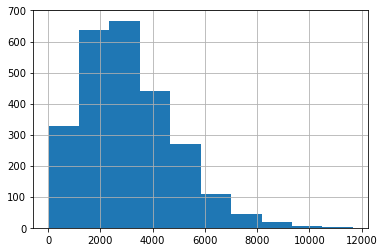

In [183]:
aggregated['Profit'].hist(bins=10)

<AxesSubplot:>

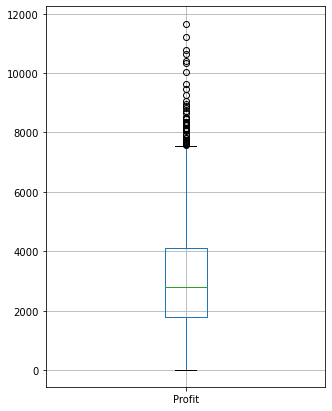

In [184]:
aggregated[['Profit']].boxplot(figsize=(5,7))

# MODEL TRAINING

Features: 'Age','tenure','gender','job_industry_category','owns_car','property_valuation','state'

In [186]:
data_for_benchmark_model = aggregated.copy()

input_features = ['Age','tenure','gender','job_industry_category','owns_car','property_valuation','state']
target_feature = ['Profit']
All_features = target_feature + input_features 

In [187]:
X_bench = data_for_benchmark_model[input_features]
Y_bench = data_for_benchmark_model[target_feature]

from sklearn.model_selection import train_test_split

# one-hot encoding for categorical features
X_bench = pd.get_dummies(X_bench)

X_train, X_test, y_train, y_test = train_test_split(X_bench, Y_bench, test_size=0.3, random_state=42)

In [188]:
#EXPORT TO EXCEL
#aggregated_dataset = pd.get_dummies(data_for_benchmark_model[All_features])
#aggregated_dataset.to_excel('aggregated_dataset.xlsx')

In [189]:
# Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train, y_train)

# Random Forest Model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# XGBoost Model
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.005)
xgb_model.fit(X_train, y_train)

# GBM Model
from sklearn.ensemble import GradientBoostingRegressor 
gbm_model = GradientBoostingRegressor(random_state=0)
gbm_model.fit(X_train, y_train)

/var/folders/c5/51_z_npj2j9020ysvx29s1jr0000gn/T/ipykernel_5658/3928449590.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
/Users/jonathanau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor(random_state=0)

In [190]:
from sklearn.metrics import mean_absolute_error
for models in [dt_model,rf_model,xgb_model,gbm_model]:
    y_pred = models.predict(X_test)
    print('MAE Score:',int(mean_absolute_error(y_test, y_pred)),str(models).split('(')[0])
    

MAE Score: 1983 DecisionTreeRegressor
MAE Score: 1451 RandomForestRegressor
MAE Score: 1386 XGBRegressor
MAE Score: 1392 GradientBoostingRegressor


I will use the xgb_model to predict new customer profit since it has the lowest MAE. Now, I will analyze which features will impact the model the most.

<AxesSubplot:>

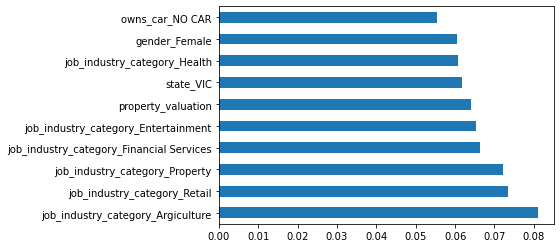

In [191]:
(pd.Series(xgb_model.feature_importances_, index=X_train.columns)
 .nlargest(10).plot(kind='barh'))

# Model Deploypment

New Customer Data Frame

In [192]:
new_customer_list = pd.read_csv('new_customer_list.csv')
new_customer_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Age                                  676 non-null    int64 
 1   first_name                           676 non-null    object
 2   last_name                            676 non-null    object
 3   gender                               676 non-null    object
 4   past_3_years_bike_related_purchases  676 non-null    int64 
 5   DOB                                  676 non-null    int64 
 6   job_title                            676 non-null    object
 7   job_industry_category                676 non-null    object
 8   wealth_segment                       676 non-null    object
 9   deceased_indicator                   676 non-null    object
 10  owns_car                             676 non-null    object
 11  tenure                               676 non-

Clean new customer list

In [193]:
new_customer_list['DOB'].dropna(inplace=True,axis=0)
new_customer_list['job_industry_category'].dropna(inplace=True,axis=0)
new_customer_list[new_customer_list['gender']!='U']

,Age,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,65,Chickie,Brister,Male,86,1957,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6
1,52,Morly,Genery,Male,69,1970,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11
2,43,Lucine,Stutt,Female,64,1979,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1
3,57,Melinda,Hadlee,Female,34,1965,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9
4,71,Druci,Brandli,Female,39,1951,Assistant Media Planner,Entertainment,High Net Worth,N,Yes,22,89105 Pearson Terrace,4075,QLD,Australia,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,63,Ferdinand,Romanetti,Male,60,1959,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7
672,21,Burk,Wortley,Male,22,2001,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10
673,68,Melloney,Temby,Female,17,1954,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2
674,70,Dickie,Cubbini,Male,30,1952,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2


In [194]:
new_customer_list

,Age,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,65,Chickie,Brister,Male,86,1957,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6
1,52,Morly,Genery,Male,69,1970,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11
2,43,Lucine,Stutt,Female,64,1979,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1
3,57,Melinda,Hadlee,Female,34,1965,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9
4,71,Druci,Brandli,Female,39,1951,Assistant Media Planner,Entertainment,High Net Worth,N,Yes,22,89105 Pearson Terrace,4075,QLD,Australia,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,63,Ferdinand,Romanetti,Male,60,1959,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7
672,21,Burk,Wortley,Male,22,2001,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10
673,68,Melloney,Temby,Female,17,1954,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2
674,70,Dickie,Cubbini,Male,30,1952,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2


## Select model features from new customer data frame

In [195]:
dataframe = new_customer_list[['Age','tenure','gender','job_industry_category','owns_car','property_valuation','state']]
model_inputs = pd.get_dummies(dataframe)
model_inputs

,Age,tenure,property_valuation,gender_Female,gender_Male,job_industry_category_Argiculture,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,owns_car_No,owns_car_Yes,state_NSW,state_QLD,state_VIC
0,65,14,6,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1,52,16,11,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0
2,43,5,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
3,57,19,9,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
4,71,22,7,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,63,9,7,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0
672,21,6,10,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0
673,68,15,2,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
674,70,19,2,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


Deploy model pipeline on new customer data set

In [196]:
predicted_profit = xgb_model.predict(model_inputs)
new_customer_list_V2['predicted_profit'] = predicted_profit

# Predicted High-Value New Customers

In [197]:
new_customer_list_V2.sort_values('predicted_profit',ascending=False).head(100)

,Age,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,predicted_profit
338,31,Worthington,Cohane,Male,60,1991,Chief Design Engineer,Entertainment,High Net Worth,N,No,2,846 Daystar Lane,2000,NSW,Australia,12,6202.806152
432,78,Darryl,Hovee,Female,2,1944,Professor,Financial Services,Mass Customer,N,Yes,19,381 Emmet Terrace,2047,NSW,Australia,12,4960.604004
345,70,Jacobo,Mucklow,Male,62,1952,Computer Systems Analyst I,Financial Services,High Net Worth,N,Yes,22,5512 Ronald Regan Hill,3122,VIC,Australia,8,4871.063965
301,79,Celia,Bryden,Female,12,1943,Chemical Engineer,Manufacturing,High Net Worth,N,No,21,2905 Towne Place,2114,NSW,Australia,9,4635.312988
453,45,Andrew,Froment,Male,58,1977,Office Assistant IV,Retail,High Net Worth,N,No,7,78 Bluestem Road,3860,VIC,Australia,2,4592.787109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,31,Beverlee,Querree,Female,42,1991,Marketing Manager,Financial Services,High Net Worth,N,Yes,12,891 Ohio Terrace,2075,NSW,Australia,12,3451.127930
509,57,Deirdre,Sturgeon,Female,11,1965,VP Sales,Retail,Mass Customer,N,Yes,9,7 Sycamore Terrace,2232,NSW,Australia,10,3450.369629
253,58,Arty,Strudwick,Male,85,1964,Data Coordiator,Health,Mass Customer,N,Yes,8,62 Melrose Court,2211,NSW,Australia,10,3448.452393
285,47,Marilin,Frome,Female,58,1975,Account Executive,IT,Mass Customer,N,Yes,17,52 Bobwhite Court,2219,NSW,Australia,9,3447.591064


In [199]:
new_customer_list_V2.sort_values('predicted_profit',ascending=False).head(100).to_excel('recommendation.xlsx')